### IDs:
Insert yours IDs to the cell below

**ID #1:** 316298876

**ID #2:** 316298256


## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. You are free to add cells.
1. Write your functions and your answers in this jupyter notebook only.
1. Answers to theoretical questions should be written in **markdown cells (with $\LaTeX$ support)**.
1. Submit this jupyter notebook only using your ID as a filename. Not to use ZIP or RAR. For example, your Moodle submission file name should look like this (two id numbers): `123456789_987654321.ipynb`.

In [107]:
import random
import time
from itertools import combinations

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from scipy.stats import multivariate_normal as mn

In [108]:
plt.rcParams['figure.figsize'] = (10, 6)

# Question 1 - Correlations (15 points)

Provide example datapoints matching the following descriptions. Each example should be constructed over n=50 datapoints. Provide a table description of the example data as well as a jointplot (see example below). 
If you think that the situation described is impossible then clearly explain why (you don’t need to give a rigorous proof).<br>
Pearson(x,y) = Pearson correlation<br>
τ(x,y) = Kendall rank correlation<br>
ρ(x,y) = Spearman rank correlation <br>
<img src="jointplot.png">

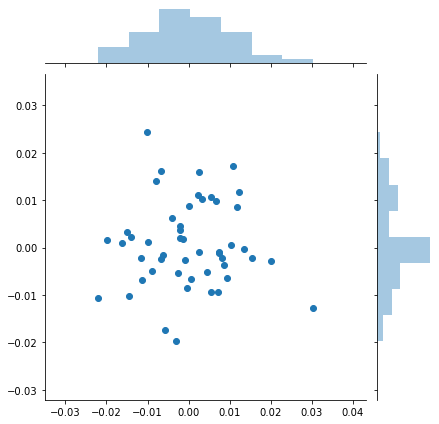

In [109]:
def plot_xy(_x: np.ndarray, _y: np.ndarray):
    df = pd.DataFrame({"X": _x, "Y": _y})
    sns.jointplot(data=df, x="X", y="Y", s=80, alpha=0.6, marginal_kws={'bins': 20, 'kde': True})
    plt.show()

In [110]:
def describe(_x: np.ndarray, _y: np.ndarray):
    df = pd.DataFrame({"X": _x, "Y": _y})
    print(df.describe().T)

## 1.A
Data in which  $Pearson(x,y) < -0.9$ but where $n-1$ points can be selected so that for the vectors restricted to those we have $Pearson(x_{n-1},y_{n-1}) > -0.2$

In [111]:
X = np.array(np.arange(1000, 1049, 1))
X = np.append(X, 2000)

Y = np.array(np.arange(1000, 1049, 1))
Y = np.append(Y, -2000)

In [112]:
print('Pearson:', stats.pearsonr(X, Y)[0])

Pearson: -0.9908798566100354


In [113]:
X

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048, 2000])

In [114]:
Y

array([ 1000,  1001,  1002,  1003,  1004,  1005,  1006,  1007,  1008,
        1009,  1010,  1011,  1012,  1013,  1014,  1015,  1016,  1017,
        1018,  1019,  1020,  1021,  1022,  1023,  1024,  1025,  1026,
        1027,  1028,  1029,  1030,  1031,  1032,  1033,  1034,  1035,
        1036,  1037,  1038,  1039,  1040,  1041,  1042,  1043,  1044,
        1045,  1046,  1047,  1048, -2000])

In [115]:
describe(_x=X, _y=Y)

   count     mean         std     min      25%     50%      75%     max
X   50.0  1043.52  138.749847  1000.0  1012.25  1024.5  1036.75  2000.0
Y   50.0   963.52  427.891949 -2000.0  1011.25  1023.5  1035.75  1048.0


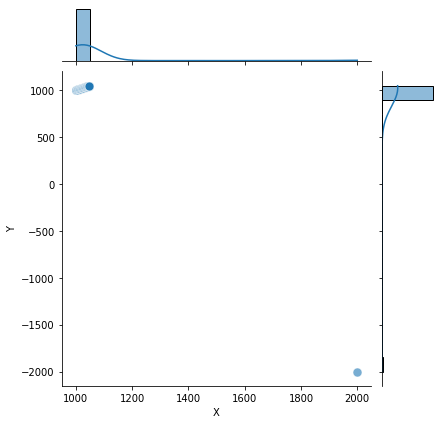

In [116]:
plot_xy(_x=X, _y=Y)

In [117]:
X_2 = X[:-1]
Y_2 = Y[:-1]

print("Pearson:", stats.pearsonr(Y_2, Y_2)[0])

Pearson: 1.0


In [118]:
X_2

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048])

In [119]:
Y_2

array([1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010,
       1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021,
       1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032,
       1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043,
       1044, 1045, 1046, 1047, 1048])

In [120]:
describe(_x=X_2, _y=Y_2)

   count    mean       std     min     25%     50%     75%     max
X   49.0  1024.0  14.28869  1000.0  1012.0  1024.0  1036.0  1048.0
Y   49.0  1024.0  14.28869  1000.0  1012.0  1024.0  1036.0  1048.0


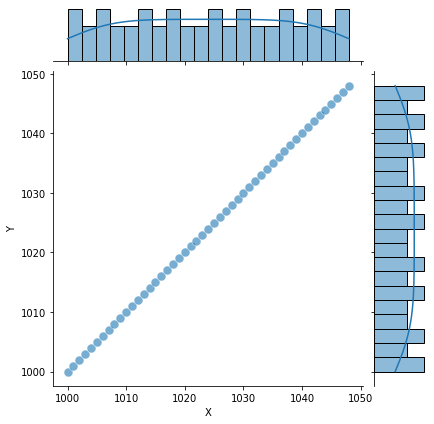

In [121]:
plot_xy(_x=X_2, _y=Y_2)

## 1.B
Data with τ(x,y) > ρ(x,y) + 0.45

In [122]:
n = 50

X = np.arange(1, n + 1)

Y = np.arange(1, (n // 2) + 1)
Y = np.append(Y, np.flip(X[:X.shape[0] // 2] * -1))

In [123]:
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [124]:
Y

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25, -25,
       -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12,
       -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1])

In [125]:
describe(_x=X, _y=Y)

   count  mean        std   min    25%   50%    75%   max
X   50.0  25.5  14.577380   1.0  13.25  25.5  37.75  50.0
Y   50.0   0.0  15.016997 -25.0 -12.75   0.0  12.75  25.0


In [126]:
print("Spearman:", stats.spearmanr(X, Y)[0])

Spearman: -0.5006002400960383


In [127]:
print("Kendall:", stats.kendalltau(X, Y)[0])

Kendall: -0.020408163265306124


In [128]:
stats.kendalltau(X, Y)[0] > stats.spearmanr(X, Y)[0] + 0.45

True

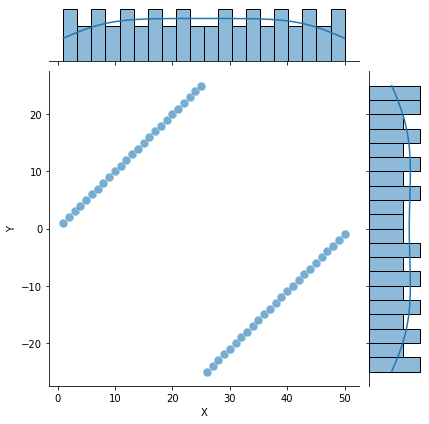

In [129]:
plot_xy(_x=X, _y=Y)

## 1.C
Data with τ(x,y) < ρ(x,y) – 0.45

In [130]:
n = 50

X = np.arange(1, n + 1)
Y = np.append(np.arange(n // 2, 0, -1), np.arange(50, n // 2, -1))

In [131]:
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [132]:
Y

array([25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,
        8,  7,  6,  5,  4,  3,  2,  1, 50, 49, 48, 47, 46, 45, 44, 43, 42,
       41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26])

In [133]:
describe(_x=X, _y=Y)

   count  mean       std  min    25%   50%    75%   max
X   50.0  25.5  14.57738  1.0  13.25  25.5  37.75  50.0
Y   50.0  25.5  14.57738  1.0  13.25  25.5  37.75  50.0


In [134]:
stats.spearmanr(X, Y)[0]

0.5006002400960383

In [135]:
stats.kendalltau(X, Y)[0]

0.020408163265306124

In [136]:
stats.kendalltau(X, Y)[0] < stats.spearmanr(X, Y)[0] - 0.45

True

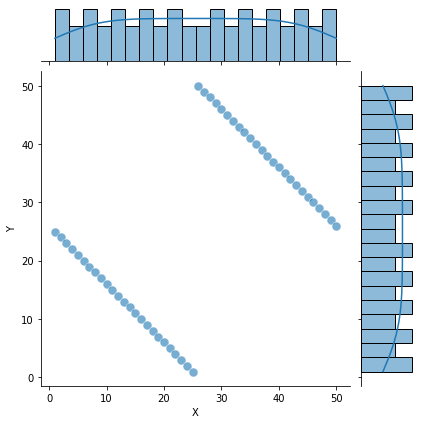

In [137]:
plot_xy(_x=X, _y=Y)

## 1.D
Data with Pearson(x,y) < ρ(x,y) – 0.6

In [138]:
n = 50

X = np.arange(1, n + 1)
Y = np.append(np.arange(1, n), 5000)

In [139]:
X

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [140]:
Y

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49, 5000])

In [141]:
describe(_x=X, _y=Y)

   count   mean         std  min    25%   50%    75%     max
X   50.0   25.5   14.577380  1.0  13.25  25.5  37.75    50.0
Y   50.0  124.5  703.713365  1.0  13.25  25.5  37.75  5000.0


In [142]:
stats.spearmanr(X, Y)[0]

0.9999999999999999

In [143]:
stats.pearsonr(X, Y)[0]

0.2619830576090001

In [144]:
stats.pearsonr(X, Y)[0] < stats.spearmanr(X, Y)[0] - 0.6

True

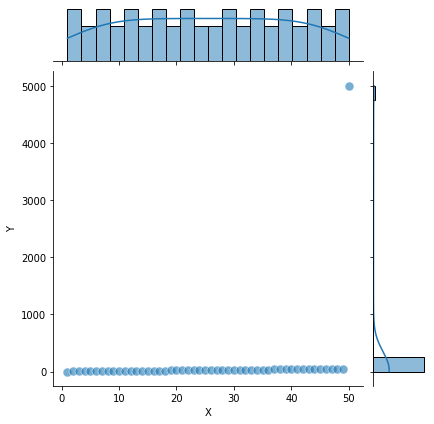

In [145]:
plot_xy(_x=X, _y=Y)

## 1.E
Data with Pearson(x,y) > ρ(x,y) + 1.2

In [146]:
n = 50

X = np.arange(1, n)
X = np.append(X, 300)

Y = np.flip(np.arange(1, n))
Y = np.append(Y, 300)

In [147]:
X

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49, 300])

In [148]:
Y

array([ 49,  48,  47,  46,  45,  44,  43,  42,  41,  40,  39,  38,  37,
        36,  35,  34,  33,  32,  31,  30,  29,  28,  27,  26,  25,  24,
        23,  22,  21,  20,  19,  18,  17,  16,  15,  14,  13,  12,  11,
        10,   9,   8,   7,   6,   5,   4,   3,   2,   1, 300])

In [149]:
describe(_x=X, _y=Y)

   count  mean        std  min    25%   50%    75%    max
X   50.0  30.5  41.382363  1.0  13.25  25.5  37.75  300.0
Y   50.0  30.5  41.382363  1.0  13.25  25.5  37.75  300.0


In [150]:
stats.spearmanr(X, Y)[0]

-0.8823529411764706

In [151]:
stats.pearsonr(X, Y)[0]

0.7664233576642335

In [152]:
stats.pearsonr(X, Y)[0] > stats.spearmanr(X, Y)[0] + 1.2

True

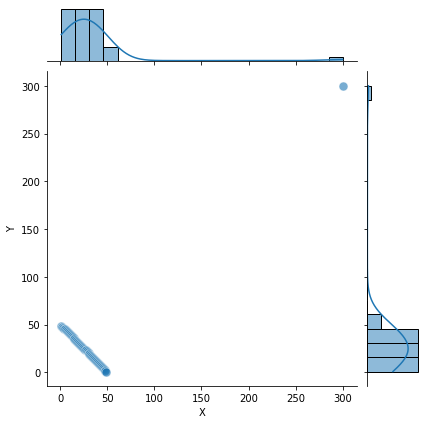

In [153]:
plot_xy(_x=X, _y=Y)

## 1.F
Data with τ(x,y) < ρ(x,y) – 1.2 

This is impossible because we measure correlations on ranks (differences cannot be larger than one), which is completely different case than correlations on actual values. Hence it is impossible to have the ranks positively correlated on one measurement and negatively on the other measurement with a difference bigger than one.

# Question 2 - Analysis of the UCI Heart Disease dataset  (40 points)

This is impossible because kendall and pearson can't be greater than one, because they measure on ranks (where differences cannot be larger than one)

Perform data analysis on the UCI Heart Disease Dataset
References:
1. Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
2. David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database."
3. Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.

Use the following links to find the details of the data: 
1. https://archive.ics.uci.edu/ml/datasets/heart+disease
2. https://www.kaggle.com/ronitf/heart-disease-uci

In the follwong cells write a report for your analysis. In your report provide a clear description of the analysis methods and of the results. This should include a graphical representation of the results and the conclusions. Provide p-values or other indicators of the statistical significance where appropriate. <br>
Design your report to be concise but still cover interesting findings.

There are missing values in the data. Find them and impute them by using the median (for numerical features) or the mode (for categorical features) value of the relevant feature (column).
Address the following questions:
* Using confidence intervals determine for which numerical features you can state with confidence of 95% that the healthy population (target = 0) mean is larger/smaller than the disease population (target = 1) mean. 
* Draw histograms for each numerical feature. Inspect the observed distributions and then use MLE to plot, on the same figures, fits of the distributions.
* For each pair of numerical feature, calculate correlations and indicate whether you find them significant. For select pairs, with significant correlations, draw joint plot with marginal histograms (see Seaborn joint plot) and find bivariate normal fits. Then use the example code below to draw plots of the bivariate pdfs (you may edit the code as you see fit).
* Are there pairs that are significantly correlated in males but not in females? The opposite? How about healthy vs disease? Can you graphically represent this?
* For each numerical feature, except age, plot the distribution for this feature against bins of age. In each bin provide a split violin plot, with different colors for healthy and disease.

Suggest, state and address at least one original question.


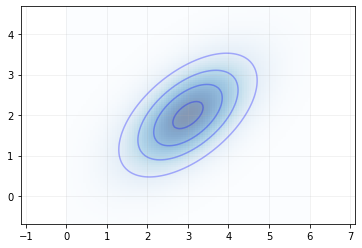

In [154]:
# Example code for bivariate pdfs
from scipy.stats import multivariate_normal as mn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    Xgrid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(Xgrid, means, cov)
    fig, ax = plt.subplots()
    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.5, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape),
               levels=[0.05, 0.1, 0.15, 0.2], alpha=0.3, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.2)
    plt.show()
    
means = [3, 2]
cov = [[1, 0.5], [0.5, 0.8]]
plot_2d_Gaussian_pdf(means, cov)

## 2.A

In [155]:
df = pd.read_csv("heart.csv", sep="\t")

cols_numerics = ['age', 'thalach', 'chol', 'trestbps', 'oldpeak']
cols_categorical = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

for c in cols_categorical:
    df[c] = df[c].fillna(stats.mode(df[c]).mode[0])

for c in cols_numerics:
    df[c] = df[c].fillna(df[c].median())

df_numerics = df[cols_numerics]

In [156]:
def confidence_interval(df: pd.DataFrame) -> (float, float, float, float, float, float):
    healthy: pd.DataFrame = df.loc[df.target == 0][df.columns[0]]
    disease: pd.DataFrame = df.loc[df.target == 1][df.columns[0]]

    healthy_mean = healthy.mean()
    disease_mean = disease.mean()
    diff_mean = healthy_mean - disease_mean

    var_a = healthy.var()
    var_b = disease.var()
    z = 1.96

    se = np.power(var_a / len(healthy) + var_b / len(disease), 0.5)
    mof = z * se

    lcb = (healthy_mean - disease_mean) - mof
    ucb = (healthy_mean - disease_mean) + mof

    return healthy_mean, disease_mean, diff_mean, mof, lcb, ucb

In [157]:
ci = [confidence_interval(df=df[[col, "target"]]) for col in cols_numerics]

cols = ["mean_healthy", "mean_disease", 'difference', 'margin_of_error', 'lcb', 'ucb']
df_result = pd.DataFrame(ci, columns=cols, index=cols_numerics)

In [158]:
df_result

,mean_healthy,mean_disease,difference,margin_of_error,lcb,ucb
age,56.666667,52.515152,4.151515,1.945449,2.206066,6.096964
thalach,139.072464,158.424242,-19.351779,4.760213,-24.111992,-14.591566
chol,250.572464,241.896970,8.675494,11.568239,-2.892745,20.243733
trestbps,134.398551,129.315152,5.083399,3.947914,1.135485,9.031313
oldpeak,1.571739,0.589091,0.982648,0.247903,0.734746,1.230551


**healthy > disease:**
1.   age
2.   trestbps
3.   oldpeak

**disease > healthy:**
1.   thalach

Which leaves us with **chol**. We can't be determined with 95% about chol.



## 2.B

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


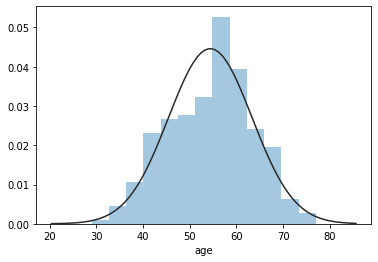

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


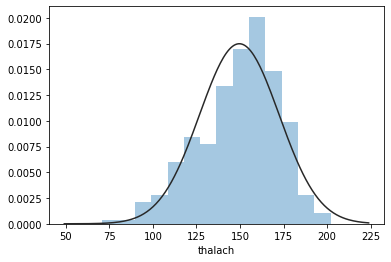

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


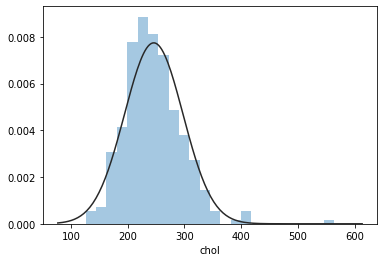

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


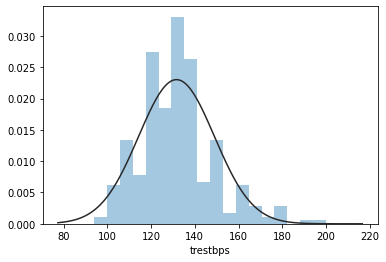

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


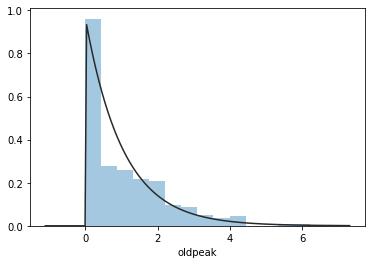

In [159]:
for c in cols_numerics[:-1]:
    sns.distplot(df[c], fit=stats.norm, kde=False)
    plt.show()

sns.distplot(df[cols_numerics[-1]], fit=stats.expon, kde=False)
plt.show()

## 2.C

In [160]:
def correlation_heatmap(df: pd.DataFrame) -> pd.DataFrame:
    df_corr = df.corr()
    sns.heatmap(data=df_corr,
                annot=True,
                linewidths=0.75,
                alpha=0.75,
                cmap="Blues")

    plt.title('Corelation Heatmap', fontsize=20)
    plt.show()

    return df_corr

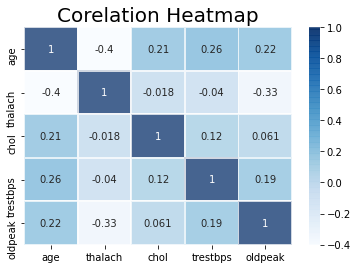

In [161]:
df_corr = correlation_heatmap(df_numerics)

In [162]:
def significant_correlations(df: pd.DataFrame, numerical_features: list, alpha: float = 0.05) -> dict:
    significant_correlations_dict = {}
    combs = [_ for _ in combinations(numerical_features, 2)]
    for comb in combs:
        feature1 = df[comb[0]]
        feature2 = df[comb[1]]
        if stats.pearsonr(feature1, feature2)[1] * 2 < alpha:
            significant_correlations_dict[comb] = stats.pearsonr(feature1, feature2)
            
    return significant_correlations_dict

In [163]:
sig_corr = significant_correlations(df=df_numerics, numerical_features=cols_numerics)
sig_corr

{('age', 'chol'): (0.20890859159075756, 0.00025034620058215866),
 ('age', 'oldpeak'): (0.21847710612643478, 0.0001262282253962564),
 ('age', 'thalach'): (-0.4016712445609852, 3.556043738767052e-13),
 ('age', 'trestbps'): (0.25679423263044077, 5.963857241774266e-06),
 ('thalach', 'oldpeak'): (-0.33006039658407577, 3.923579112947149e-09),
 ('trestbps', 'oldpeak'): (0.1942201252180719, 0.0006757818866385415)}

**Significant correlated:**

1. **age** and **chol** are significant correlated
2. **age** and **oldpeak** are significant correlated
3. **age** and **thalach** are significant correlated
4. **age** and **trestbps** are significant correlated
5. **thalach** and **oldpeak** are significant correlated
6. **trestbps** and **oldpeak** are significant correlated

In [164]:
plt.rcParams['figure.figsize'] = (10, 5)

In [165]:
def plot_2d_Gaussian_pdf(means, cov):
    n = 100
    x1 = np.linspace(means[0] - 3 * np.sqrt(cov[0][0]), means[0] + 3 * np.sqrt(cov[0][0]), n)
    x2 = np.linspace(means[1] - 3 * np.sqrt(cov[1][1]), means[1] + 3 * np.sqrt(cov[1][1]), n)
    x1_v, x2_v = np.meshgrid(x1, x2)
    x_grid = np.vstack([x1_v.ravel(), x2_v.ravel()]).T
    Y = mn.pdf(x_grid, means, cov)
    fig, ax = plt.subplots()
    plt.title('2d Gaussian pdf', fontsize=13, color='navy')

    ax.pcolorfast(x1, x2, Y.reshape(x1_v.shape), alpha=0.55, cmap='Blues')
    ax.contour(x1_v, x2_v, Y.reshape(x1_v.shape), alpha=0.35, colors='b')
    ax.axis('equal')
    ax.grid(alpha=0.25)
    plt.show()

In [166]:
def plot_2_features(df: pd.DataFrame, featue1: str, featue2: str):
    p = sns.jointplot(df[featue1], df[featue2], kind='reg')
    plt.suptitle(f'{featue1} vs {featue2}', va="bottom", fontsize=20, color='red', weight='bold')
    cov = np.cov(df[featue1], df[featue2])
    means = np.array(df[[featue1, featue2]].mean())
    plot_2d_Gaussian_pdf(means=means, cov=cov)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


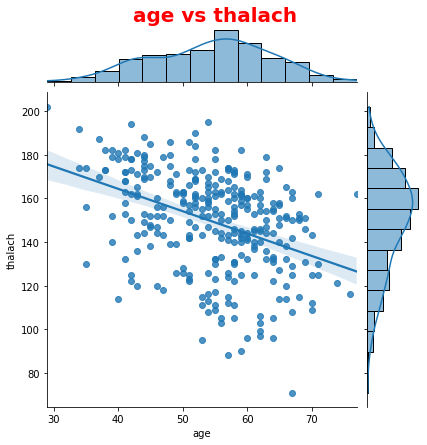

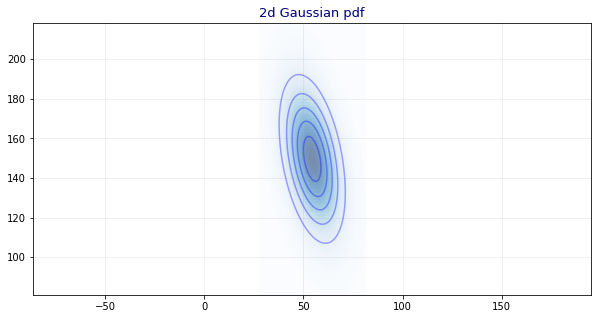

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


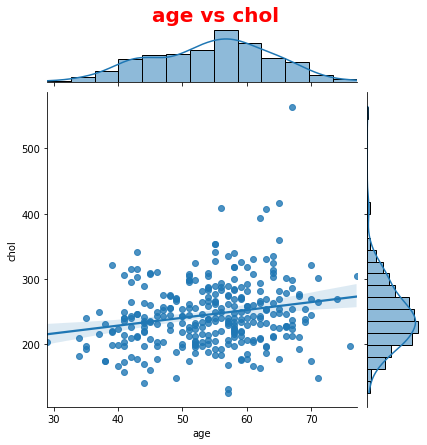

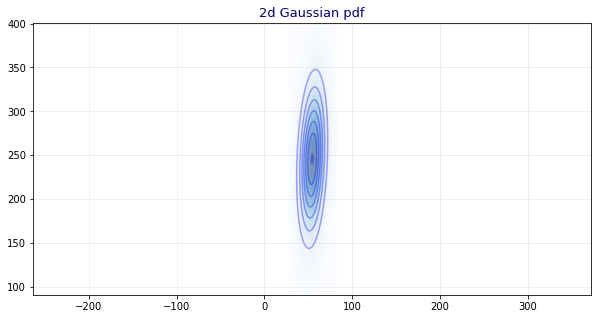

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


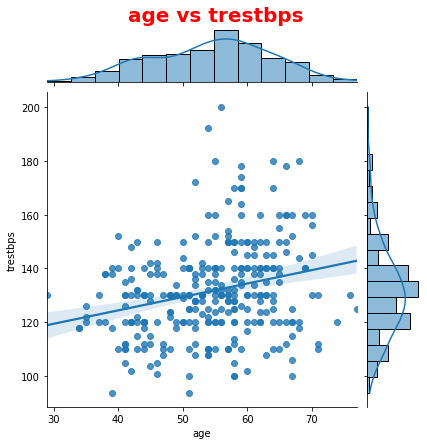

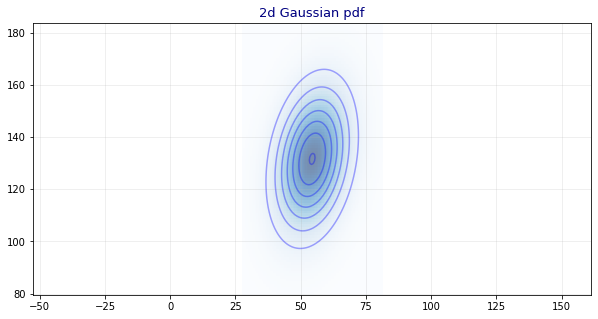

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


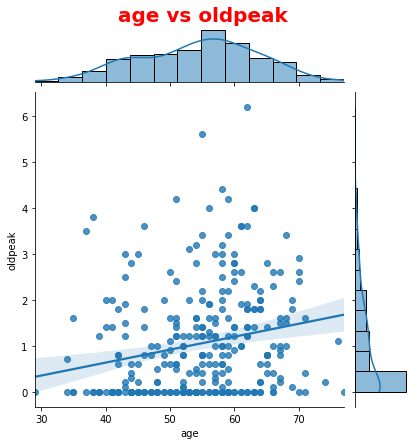

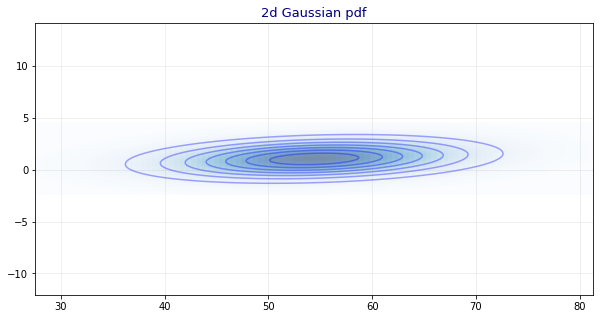

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


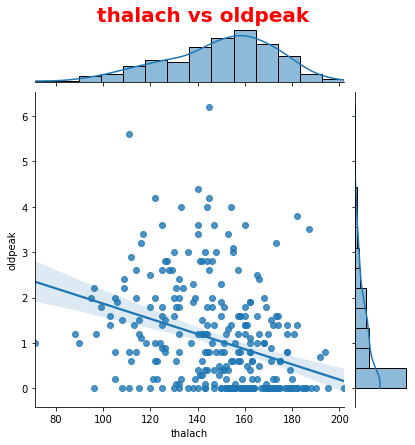

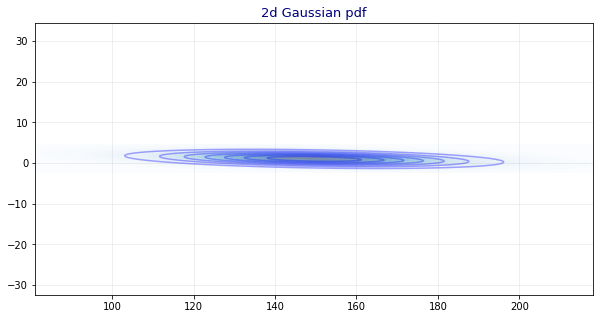

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


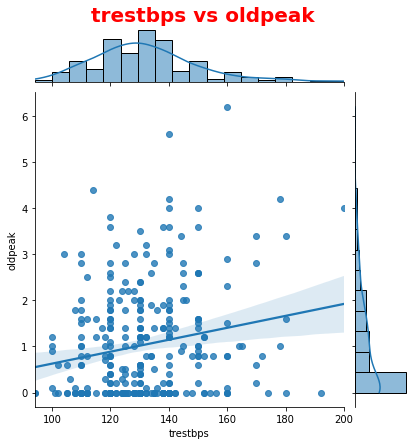

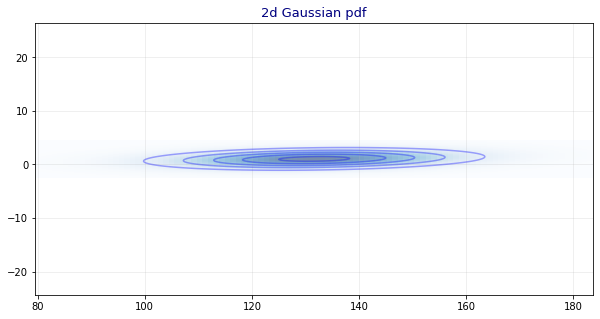

In [167]:
for key in sig_corr.keys():
    plot_2_features(df=df, featue1=key[0], featue2=key[1])

## 2.D

In [168]:
sig_corr = significant_correlations(df=df_numerics[df['sex'] == 1], numerical_features=cols_numerics)
sig_corr

{('age', 'chol'): (0.16891721156640868, 0.014726745737347745),
 ('age', 'oldpeak'): (0.22794871709477993, 0.0009282520609480024),
 ('age', 'thalach'): (-0.4140017376688977, 5.100029237916627e-10),
 ('age', 'trestbps'): (0.2446891412503045, 0.00036805291206825036),
 ('thalach', 'oldpeak'): (-0.35755772683837445, 1.1452825202427319e-07)}

In [169]:
sig_corr = significant_correlations(df=df_numerics[df['sex'] == 0], numerical_features=cols_numerics)
sig_corr

{('age', 'chol'): (0.24054748600020534, 0.018868508405647588),
 ('age', 'oldpeak'): (0.23098220284826126, 0.02431726088092611),
 ('age', 'thalach'): (-0.39921404243522557, 6.136561741420976e-05),
 ('age', 'trestbps'): (0.26850161247211907, 0.00851633985505221),
 ('thalach', 'oldpeak'): (-0.24771163097479035, 0.015508537686676234),
 ('trestbps', 'oldpeak'): (0.3894818769616579, 9.572956503027135e-05)}

trestbps & oldpeak are significant correlated in female but **not** in men

Text(0.5, 1.0, 'Oldpeak and Trestbps features seperated to Male and Female')

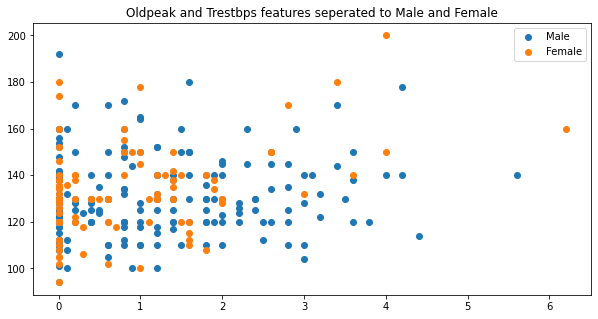

In [170]:
df_male = df_numerics[df['sex'] == 1]
df_female = df_numerics[df['sex'] == 0]

plt.scatter(df_male['oldpeak'], df_male['trestbps'])
plt.scatter(df_female['oldpeak'], df_female['trestbps'])
plt.legend(labels=['Male', 'Female'])
plt.title('Oldpeak and Trestbps features seperated to Male and Female')

In [171]:
sig_corr = significant_correlations(df=df_numerics[df['target'] == 0], numerical_features=cols_numerics)
sig_corr

{('age', 'trestbps'): (0.2290514850496304, 0.006886271314418767)}

In [172]:
sig_corr = significant_correlations(df=df_numerics[df['target'] == 1], numerical_features=cols_numerics)
sig_corr

{('age', 'chol'): (0.23796648118637337, 0.0020851070364645017),
 ('age', 'oldpeak'): (0.19415715400135383, 0.012459351593491291),
 ('age', 'thalach'): (-0.5275420051360303, 3.329564537668829e-13),
 ('age', 'trestbps'): (0.24010417219010405, 0.0018943355389180446),
 ('thalach', 'oldpeak'): (-0.18380496346158295, 0.01811598215114188),
 ('trestbps', 'oldpeak'): (0.18067711587726026, 0.020214525598425893)}

Everything but age & trestbps are significant correlated in disease but **not** in healthy.

## 2.E

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


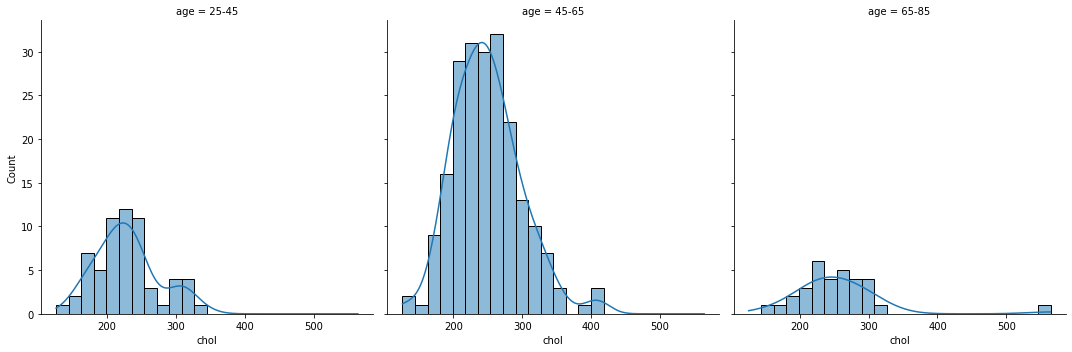

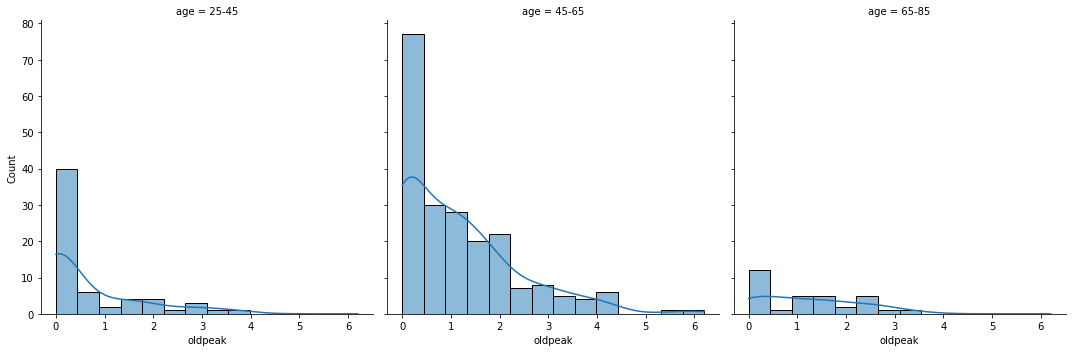

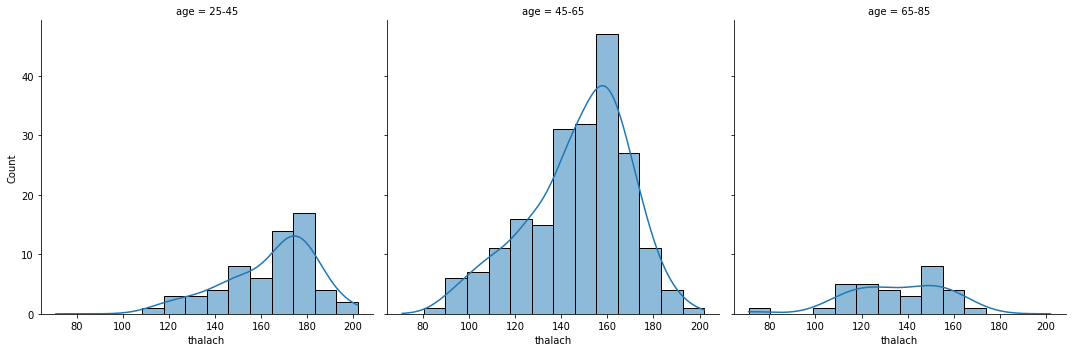

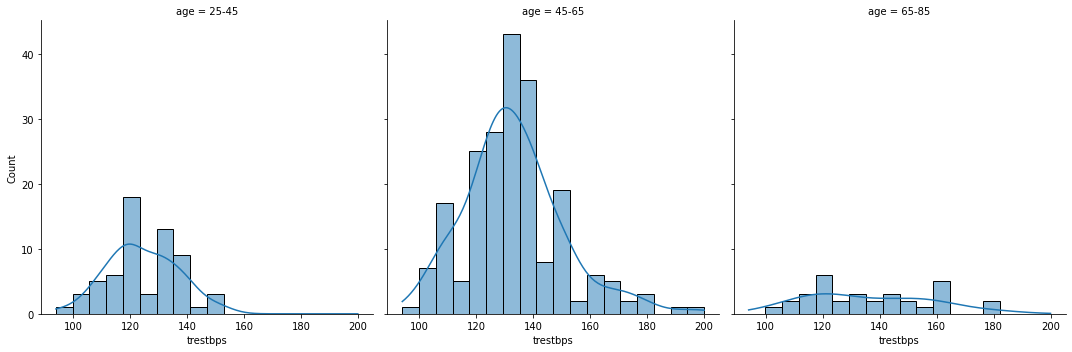

In [173]:
ages_cut = pd.cut(df['age'], bins=[25, 45, 65, 85], labels=['25-45', '45-65', '65-85'])
df_numerics.age = ages_cut

sns.displot(data=df_numerics, x="chol", col="age", kde=True)
sns.displot(data=df_numerics, x="oldpeak", col="age", kde=True)
sns.displot(data=df_numerics, x="thalach", col="age", kde=True)
sns.displot(data=df_numerics, x="trestbps", col="age", kde=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


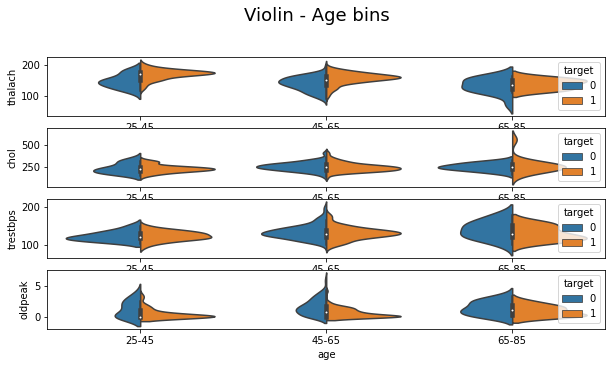

In [174]:
df_viloin = df[['age', 'thalach', 'chol', 'trestbps', 'oldpeak', 'target']]
df_viloin.age = ages_cut

fig, ax = plt.subplots(4, 1)
fig.suptitle("Violin - Age bins", va="baseline", fontsize=18)

cols = ['thalach', 'chol', 'trestbps', 'oldpeak']

for i in range(len(cols)):
    sns.violinplot(ax=ax[i], x="age", y=cols[i], hue="target", split=True, data=df_viloin)

# Question 3 - Heavy Tailed distributions (10 points)

Recall the definition of Heavy Tailed distribtion from the lectures.

*A distribution is said to have a heavy right tail if its tail probabilities vanish slower than any exponential*
$$ \forall t>0, \lim_{x\to\infty} e^{tx}P(X>x)=\infty $$

## 3.A
Does the standard normal distribution have a heavy right tail? prove your answer.

**No.**

Since CDF of standard normal $\Phi$ does not have closed form we know upper and lower bounds. 

$\frac{1}{\sqrt{2\pi}}\frac{x}{x^2+1}e^{-\frac{x^2}{2}} \leq 1 - \Phi(x) \leq \frac{1}{\sqrt{2\pi}}\frac{1}{x}e^{-\frac{x^2}{2}}$

$1 - \Phi(x) \leq \frac{1}{\sqrt{2\pi}}\frac{1}{x}e^{-\frac{x^2}{2}}$


As we can see $\frac{1}{\sqrt{2\pi}}\frac{1}{x}\frac{1}{e^{\frac{x^2}{2}}}$ is getting to zero much faster than $e^{tx}$ getting to $\infty$ ($e^{x^2} > e^{tx}$) where $\lim_{x\to\infty}$ and $t > 0$

Hence $1 - \Phi(x)$ is getting even more faster to zero, therefore, tail probabilities vanish **faster** than any exponential $\rightarrow$ tail is **light**.


## 3.B
Does the standard log-normal distribution have a heavy right tail? prove your answer.

**Yes.**

Lets take a look at Log-normal distribution PDF

$f_X(x)= \frac{1}{x\sigma\sqrt{2\pi}} \cdot e^{-\frac{(\ln{x} - \mu)^2}{2\sigma^2}}$
$= \frac{1}{x\sigma\sqrt{2\pi}} \cdot \frac{1}{e^{\frac{(\ln{x} - \mu)^2}{2\sigma^2}}}$

Let's remove all constants from the equation (they won't make any differences in the $\infty$)

$f_X(x)= \frac{1}{x} \cdot \frac{1}{e^{(\ln{x})^2}} = \frac{1}{xe^{(\ln{x})^2}}$

$e^{tx} > x\cdot e^{(\ln{x})^2}$ where $\lim_{x\to\infty}$ and $t > 0$.

As we can see $e^{(\ln{x})^2}$ is much more small than $e^{tx}$, Hence Log-normal right tail is **heavy**. Tail probabilities vanish slower than any exponential.


# Question 4 - CLT for Markov chains (20 points)

In this exercise you will construct trajectories of Markovian dice rolling results in the following way.<br>
The first roll, $X_0$, is $U(1...6)$, i.e. $P(X_0=i)=\pi_0(i)=1/6, \forall i\in{\{1,..,6\}}$<br>
After i rolls are determined the $i+1^{st}, X_{i+1},$ is drawn according to the row that corresponds to the value of $X_i$ in the matrix $T$ below. <br>
In other words, $T$ is the transition matrix of a Markov chain and the initial distribution is uniform.

\begin{equation*}
T = 
\begin{pmatrix}
0.4 & 0.2 & 0.1 & 0 & 0.1 & 0.2 \\
0.2 & 0.4 & 0.2 & 0.1 & 0 & 0.1 \\
0.1 & 0.2 & 0.4 & 0.2 & 0.1 & 0 \\
0 & 0.1 & 0.2 & 0.4 & 0.2 & 0.1 \\
0.1 & 0 & 0.1 & 0.2 & 0.4 & 0.2 \\
0.2 & 0.1 & 0 & 0.1 & 0.2 & 0.4
\end{pmatrix}
\end{equation*}

## 4.A
Construct 1000 trajectories, each of length 30.
1. What do you expect the average value of all 30 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

In [175]:
states = np.arange(1, 7)
transitionMatrix = np.array([[0.4, 0.2, 0.1, 0, 0.1, 0.2],
                             [0.2, 0.4, 0.2, 0.1, 0, 0.1],
                             [0.1, 0.2, 0.4, 0.2, 0.1, 0],
                             [0, 0.1, 0.2, 0.4, 0.2, 0.1],
                             [0.1, 0, 0.1, 0.2, 0.4, 0.2],
                             [0.2, 0.1, 0, 0.1, 0.2, 0.4]])


def roll_dice_n_times(n: int) -> float:
    state = random.randint(1, 6)
    num = state
    for i in range(n):
        state = np.random.choice(states, replace=True, p=transitionMatrix[state - 1])
        num += state
    avg = num / n
    return avg

In [176]:
avg_values_4A = [roll_dice_n_times(30) for _ in range(1000)]

_series_4A = pd.Series(avg_values_4A)

In [177]:
print("The empirical mean is: ", np.round(_series_4A.mean(), 4))
print("The empirical std is: ", np.round(_series_4A.std(), 4))

The empirical mean is:  3.6026
The empirical std is:  0.4811


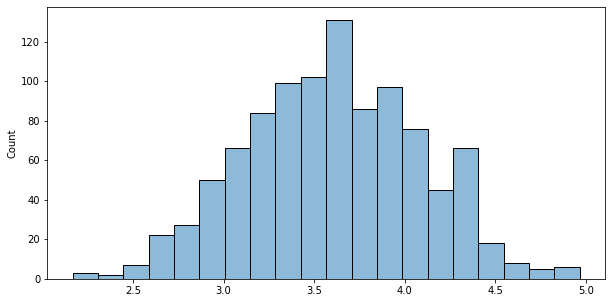

In [178]:
sns.histplot(data=_series_4A, bins=20, alpha=0.5)

## 4.B
Construct 1000 trajectories, each of length 500.
1. What do you expect the average value of all 500 numbers in a trajectory to be?
2. Compute the average value of each such trajectory. Draw a histogram of the 1000 numbers you received, using 20 bins.
3. What does the distribution look like? What are the empirical mean and the std?

We expecting the average value to be around 3.5 as well, because, the transition matrix doesn't seem to affect the state in a certain direction.

We expected it to be similar to dice rolls. 
However, this time the average must be much more concentrated around 3.5 because it is the result of 500 dice rolls as opposed to 30.   

In [179]:
avg_values_4B = [roll_dice_n_times(500) for _ in range(1000)]

_series_4B = pd.Series(avg_values_4B)

In [180]:
print("The empirical mean is: ", np.round(_series_4B.mean(), 4))
print("The empirical std is: ", np.round(_series_4B.std(), 4))

The empirical mean is:  3.5112
The empirical std is:  0.1209


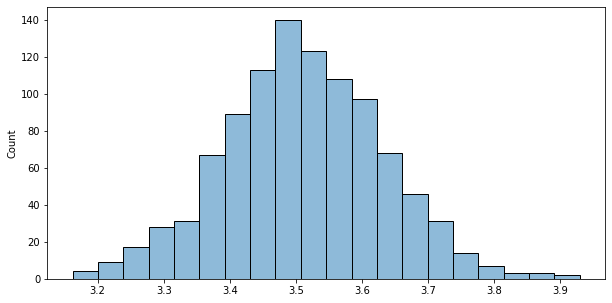

In [181]:
sns.histplot(data=_series_4B, bins=20, alpha=0.5)

## 4.C
Draw normal fit curves on your two histograms.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


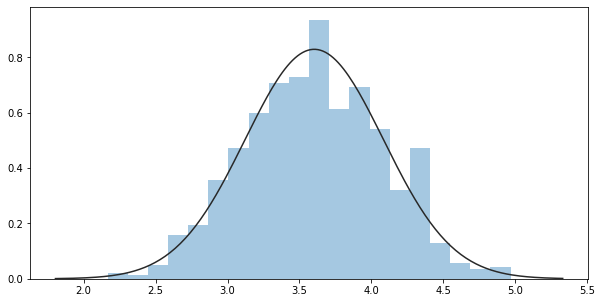

In [182]:
sns.distplot(_series_4A, fit=stats.norm, bins=20, kde=False)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


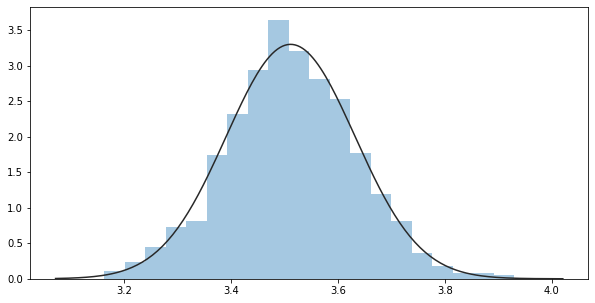

In [183]:
sns.distplot(_series_4B, fit=stats.norm, bins=20, kde=False)

## 4.D
Write a python code to calculate $Cov(X_0,X_i)$ for $i=1,..,500$ based on $\pi_0$ and $T$. 

Compute the values for our case.

In [184]:
currentMatrix = np.array(transitionMatrix)
def calc(currentMatrix: np.ndarray) -> float:
    Ex = 3.5 # X_0 is uniform between 1-6(dice roll)
    Ey = 3.5
    Exy = 0
    for i in range(6):
        for j in range(6):
            Exy += currentMatrix[i][j] * (i+1) * (j+1) # We calculating E(XY) = x1y1p(x1,y1) + x1y2p(x1,y2) + x2y1p(x2,y1)+ ... + xnymp(xn,ym)
    covariance = (Exy - Ex*Ey) * (1/6) # According to the formula. We muliplied by 1/6 to keep the total probabilty sum at 1 insted of 6.
    return covariance

In [185]:
for i in range(501): # In our case, after 10 steps the matrix reaches an equilibrium
    ans = f'Cov(X_0,X_{i}) = '
    print(ans, calc(currentMatrix))
    currentMatrix = currentMatrix.dot(transitionMatrix)

Cov(X_0,X_0) =  11.325000000000003
Cov(X_0,X_1) =  10.725000000000001
Cov(X_0,X_2) =  10.461
Cov(X_0,X_3) =  10.333800000000004
Cov(X_0,X_4) =  10.27092
Cov(X_0,X_5) =  10.239600000000006
Cov(X_0,X_6) =  10.223961600000003
Cov(X_0,X_7) =  10.216146480000006
Cov(X_0,X_8) =  10.212239712000006
Cov(X_0,X_9) =  10.210286484000004
Cov(X_0,X_10) =  10.209309900960005
Cov(X_0,X_11) =  10.20882161560801
Cov(X_0,X_12) =  10.208577474163206
Cov(X_0,X_13) =  10.20845540368681
Cov(X_0,X_14) =  10.208394368497785
Cov(X_0,X_15) =  10.20836385091311
Cov(X_0,X_16) =  10.208348592122734
Cov(X_0,X_17) =  10.20834096272794
Cov(X_0,X_18) =  10.208337148030624
Cov(X_0,X_19) =  10.208335240681983
Cov(X_0,X_20) =  10.208334287007666
Cov(X_0,X_21) =  10.208333810170505
Cov(X_0,X_22) =  10.208333571751925
Cov(X_0,X_23) =  10.20833345254264
Cov(X_0,X_24) =  10.208333392937995
Cov(X_0,X_25) =  10.208333363135672
Cov(X_0,X_26) =  10.208333348234511
Cov(X_0,X_27) =  10.208333340783934
Cov(X_0,X_28) =  10.208333337

## 4.E - Bonus
Let $\bar{X_n}$ be the sample average for a single trajectory of length $n$.
1. Show that **in our case**:
$$E(\bar{X_n}) =E(X_0)$$
What is it in our case ($\pi_0$ and $T$ as defined above)?
2. Show that 
$$Var(\bar{X_n}) = \frac{1}{n}\sigma_0^2 + \frac{2}{n^2}\sum_{d=1}^{n-1}(n-d)Cov(X_0, X_d)$$
Calculate it for our case.
3. Formulate the CLT for Markov Chains.
4. Graphically show that the CLT holds for n=500 in our case.

# Question 5 - Sampling of Kendall correlation (15 points)

Recall that the Naive time complexity of computing Kendall correlation is $O(n^2)$. We will investigate a sampling approach to approximate Kendall correlations efficiently. 

## 5.A
Draw a sample of 10M samples from a bivariate distribution $(X,Y)\sim \mathcal{N}(\bf{0},S)$ with the covariance matrix $S=\begin{pmatrix} 2 & 3\\ 3 & 5 \end{pmatrix}$. <br>
Calculate the Kendall correlation $\tau(X,Y)$.
How long did this calculation take?

In [186]:
sig = np.array([[2, 3], [3, 5]])

_normal = np.random.multivariate_normal(mean=[0, 0], cov=sig, size=10 ** 7)

start_time = time.time()
real_tau = stats.kendalltau(_normal[:, 0], _normal[:, 1])[0]
print("Tau:", real_tau)
print("Calculation time:", time.time() - start_time)
print("Naive complexcity time: (10^7)^2")

Tau: 0.7951585623589763
Calculation time: 8.993367433547974
Naive complexcity time: (10^7)^2


In [ ]:
sns.jointplot(_normal[:,0], _normal[:,1] ,s=100,alpha=0.9,marginal_kws=dict(bins=20, kde=True));

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


## 5.B
Sample 1,000 points from the data and calculate the Kendall correlation $\tau(U,V)$. 

In [ ]:
def calc_tau(dst: np.ndarray, size: int) -> float:
    indices = np.random.choice(np.arange(0, _normal.shape[0]), size)

    return stats.kendalltau(_normal[indices, 0], _normal[indices, 1])[0]

In [ ]:
print("Tau:", calc_tau(dst=_normal, size=1000))

## 5.C
Repeat Section 5.B 1000 times and plot a histogram of the calculated $\tau(U,V)$ values. Indicate the true $\tau(X,Y)$ (calculated on the entire 10M samples) on the histogram. What are the empirical mean and stadard deviation of the calculated $\tau(U,V)$ values?

In [ ]:
def calc_random_tau(dst: np.ndarray, m: int) -> (np.ndarray, float):
    results = list()
    times = list()

    start_time = time.time()
    for i in range(1000):
        results.append(calc_tau(dst=_normal, size=m))

    return np.array(results), time.time() - start_time

In [ ]:
def q5_c(m: int) -> (int, float, float, float, float, float):
    results, time_elapsed = calc_random_tau(dst=_normal, m=m)

    real_tau = 0.795197107062670

    _mean = np.mean(results)
    _std = np.std(results)
    acc = np.round_(1 - (np.abs(_mean - real_tau) / real_tau), 6) * 100
    print(f'\n\n---------- Results - m={m} ----------')
    print("Mean:", np.round(_mean, 4))
    print("Standard Deviation:", np.round(_std, 4))
    print(f'Accuracy: {acc}%')
    print("Naive complexcity time O(n^2):", m ** 2)
    print("---------- End Results ----------\n\n\n\n")

    sns.distplot(results, bins=30)
    plt.suptitle("Tau Hist", va='top', fontsize=20, color='red')

    plt.show()

    return {"points": m, "result": _mean, "accuracy": acc, "std": _std, "complexity": m ** 2, "running_time": time_elapsed}

In [ ]:
q5_c(m=1000)

## 5.D
Repeat Section 5.C for samples of $m={10, 50, 100, 500, 1000, 5000}$ points. <br>
What is the naive time complexity of each calculation? <br>
Compare the empirical time complexity and the standard deviation of the calucated values to the size of the sample.

In [ ]:
ms = [10, 50, 100, 500, 1000, 5000]

df = pd.DataFrame(columns=["points", "result", "accuracy", "std", "complexity", "running_time"])

for m in ms:
    df = df.append(q5_c(m=m), ignore_index=True)

In [ ]:
df

In [ ]:
mean_3 = 0.794600
std_3 = 0.023708

In [ ]:
plt.rcParams['figure.figsize'] = (20, 5)

fig, ax = plt.subplots(1, 3)

sns.lineplot(data=df, x=df['points'], y=df['accuracy'], ax=ax[0], alpha=0.7)
ax[0].set_title('Accuracy', size=16)

sns.lineplot(data=df, x=df['points'], y=df['std'], ax=ax[1], alpha=0.7)
ax[1].set_title('Std', size=16)

sns.lineplot(data=df, x=df['points'], y=df['complexity'], ax=ax[2], alpha=0.7)
ax[2].set_title('Naive Time Complexity O(n^2)', size=16)

## 5.E
A coleague found an old dataset which she believes originated from the same popuation as the data in Section 5.A. The dataset is avaialble as "Kendall_data.csv". 

Using Kendall correlation and your answer to Section 5.D, how much confidence do you have in rejecting your coleague's claim? Explain your answer and show your calculation.

In [ ]:
csv_df = pd.read_csv("Kendall_data.csv", sep=',',header=None)

In [ ]:
arr_values = csv_df.values
u = arr_values[:, 0]
v = arr_values[:, 1]
tau, p_value = stats.kendalltau(u, v)
tau

In [ ]:
p_cdf = stats.norm.cdf(tau, mean_3, std_3)
p_cdf

In [ ]:
_nml = np.random.normal(mean_3, std_3, 100)

plt.figure(figsize=(10, 5))
plt.title("H_0 hypothesis CDF", size=15)
g = sns.distplot(_nml, hist_kws={'cumulative': True}, kde_kws={'cumulative': True})
g.axvline(tau, 0, 1, color='green', linestyle='--', linewidth=1.5)
g.axhline(p_cdf, xmax=1, color='green', linestyle='--', linewidth=1.5)

print("Tau:", round(tau, 3))
print("Density (CDF):", round(p_cdf, 3))